In [3]:
import os
os.getcwd()

'C:\\Users\\Nisha Yadav'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LABELS=['Normal','Fraud']
data=pd.read_csv('creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
x=data.drop('Class',axis=1)
y=data['Class']


In [4]:
data.shape

(284807, 31)

In [5]:
#count the null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Fraud Cased and Non Fraud cases

In [6]:
fraud_cases=len(data[data['Class']==1])
print('number of fraud cases:=',fraud_cases)
Nonfraud_cases=len(data[data['Class']==0])
print('number of Nonfraud cases:=',Nonfraud_cases)

number of fraud cases:= 492
number of Nonfraud cases:= 284315


In [7]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

'''Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud.
    If we use this dataframe as the base for our predictive models and analysis we might get 
    a lot of errors and our algorithms will probably overfit since it will "assume" that most
    transactions are not fraud. But we don't want our model to assume, we want our model to 
    detect patterns that give signs of fraud'''

Text(0, 0.5, 'frequency')

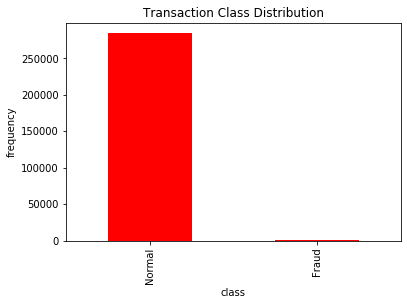

In [30]:
count_classes=pd.value_counts(data['Class'],sort=True)
count_classes.plot(kind='bar',color='red')
plt.title('Transaction Class Distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('class')
plt.ylabel('frequency')

In [9]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?

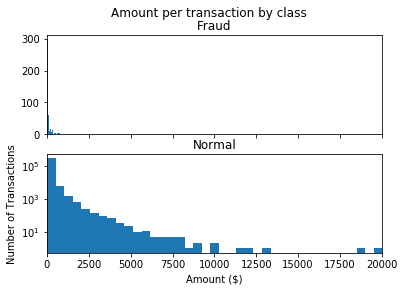

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

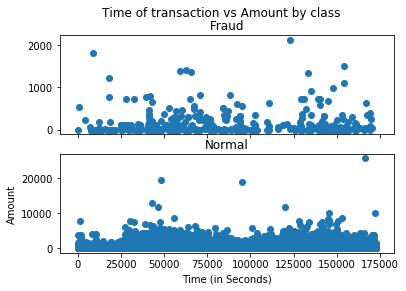

In [11]:

# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

# LOGISTIC REGRESSION ON ORIGINAL DATA(Imbalance Data)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [13]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
y_pred


C:\Users\Nisha Yadav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred)

0.9989115550718023

Confusion Matrix:
 [[56846    11]
 [   51    54]]


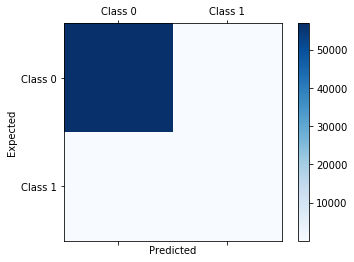

In [15]:
conf_mat=confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',conf_mat)
labels=['Class 0','Class 1']
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(conf_mat,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Performing Sampling Technique to balance the data
Random Oversampling: Randomly duplicate examples in the minority class.
Random Undersampling: Randomly delete examples in the majority class.

random under sampling:
1    492
0    492
Name: Class, dtype: int64


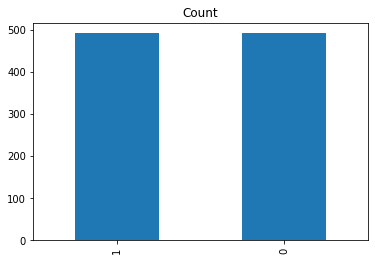

In [17]:
#Random UnderSampling
normal_under=normal.sample(fraud_cases)
under_sample=pd.concat([normal_under,fraud],axis=0)
print('random under sampling:')
print(under_sample.Class.value_counts())
under_sample.Class.value_counts().plot(kind='bar',title='Count')

random under sampling:
1    284315
0    284315
Name: Class, dtype: int64


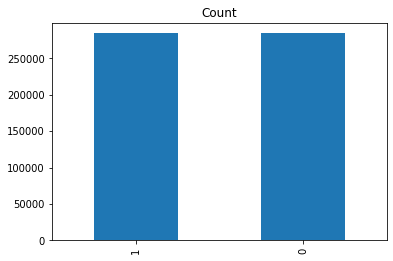

In [18]:
#Random OverSampling
fraud_over=fraud.sample(Nonfraud_cases,replace=True)
over_sample=pd.concat([fraud_over,normal],axis=0)
print('random under sampling:')
print(over_sample.Class.value_counts())
over_sample.Class.value_counts().plot(kind='bar',title='Count')

In [19]:
over_sample.head()
X=over_sample.drop('Class',axis=1)
Y=over_sample['Class']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2)

# LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred_log=log.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score

print('Accuracy:',accuracy_score(y_test,y_pred_log))
print('Precision:',precision_score(y_test,y_pred_log))
print('Recall:',recall_score(y_test,y_pred_log))
print('F1 score:',f1_score(y_test,y_pred_log))

C:\Users\Nisha Yadav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9383518280780121
Precision: 0.9721187129967654
Recall: 0.9027402072720885
F1 score: 0.9361457963332331


Confusion Matrix:
 [[55322  1474]
 [ 5537 51393]]


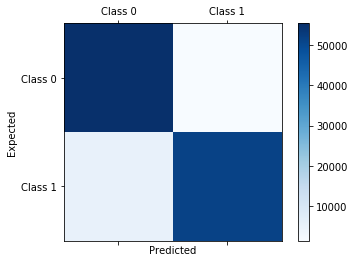

In [22]:
conf_mat_log=confusion_matrix(y_test, y_pred_log)
print('Confusion Matrix:\n',conf_mat_log)

labels=['Class 0','Class 1']
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(conf_mat_log,cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# DECISION TREE CLASSIFIER

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)
y_pred_dtc=dtc.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_dtc))
print('Precision:',precision_score(y_test,y_pred_dtc))
print('Recall:',recall_score(y_test,y_pred_dtc))
print('F1 score:',f1_score(y_test,y_pred_dtc))
conf_mat_dtc=confusion_matrix(y_test, y_pred_dtc)
print('Confusion Matrix:\n',conf_mat_dtc)

Accuracy: 0.9997889664632538
Precision: 0.999578607297117
Recall: 1.0
F1 score: 0.9997892592462505
Confusion Matrix:
 [[56772    24]
 [    0 56930]]


# Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()
nv.fit(x_train,y_train)
y_pred_nv=nv.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred_nv))


Accuracy: 0.8670488718498848


In [28]:
print('Precision:',precision_score(y_test,y_pred_nv))
print('Recall:',recall_score(y_test,y_pred_nv))
print('F1 score:',f1_score(y_test,y_pred_nv))
conf_mat_nv=confusion_matrix(y_test, y_pred_nv)
print('Confusion Matrix:\n',conf_mat_nv)

Precision: 0.9883433003176977
Recall: 0.7431758299666257
F1 score: 0.8484028153762859
Confusion Matrix:
 [[56297   499]
 [14621 42309]]
